<a href="https://colab.research.google.com/github/lucaskmiyazaki/Machine_Learning/blob/master/wildfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [0]:
path = "/content/drive/My Drive/carreira/hackaton/data/database_fires.csv"
df = pd.read_csv(path)

In [0]:
path = "/content/drive/My Drive/carreira/hackaton/data/respostas.csv"
resp = pd.read_csv(path)

In [0]:
print(df.columns)

Index(['id', 'estado', 'estacao', 'data', 'precipitacao', 'temp_max',
       'temp_min', 'insolacao', 'evaporacao_piche', 'temp_comp_med',
       'umidade_rel_med', 'vel_vento_med', 'altitude', 'fires'],
      dtype='object')


In [0]:
print(df.insolacao)

0         2.3
1         4.4
2         0.6
3         2.0
4         0.1
         ... 
251762    9.0
251763    8.6
251764    6.9
251765    7.9
251766    9.9
Name: insolacao, Length: 251767, dtype: float64


In [0]:
date = pd.to_datetime(df.data)
df["ano"] = pd.DatetimeIndex(date).year
df["mes"] = pd.DatetimeIndex(date).month 
df.drop(["data"], axis = 1, inplace = True)
print(df.columns)

date = pd.to_datetime(resp.data)
resp["ano"] = pd.DatetimeIndex(date).year
resp["mes"] = pd.DatetimeIndex(date).month 
resp.drop(["data"], axis = 1, inplace = True)
print(resp.columns)

Index(['id', 'estado', 'estacao', 'precipitacao', 'temp_max', 'temp_min',
       'insolacao', 'evaporacao_piche', 'temp_comp_med', 'umidade_rel_med',
       'vel_vento_med', 'altitude', 'fires', 'ano', 'mes'],
      dtype='object')
Index(['id', 'estado', 'estacao', 'precipitacao', 'temp_max', 'temp_min',
       'insolacao', 'evaporacao_piche', 'temp_comp_med', 'umidade_rel_med',
       'vel_vento_med', 'altitude', 'ano', 'mes'],
      dtype='object')


In [0]:
state, code_state = pd.factorize(df.estado)
month, code_month = pd.factorize(df.mes)
print(code_state, code_month)
heatMap = pd.DataFrame(index = code_state, columns=code_month)
#heatMap.columns = code_month
#heatMap.index = code_month
for i in range(len(code_month)):
  for j in range(len(code_state)):
    #print("o")
    heatMap[code_month[i]][code_state[j]] = 0

for i in range(len(df)):
  if df.fires[i] == 1:
    heatMap[df.mes[i]][df.estado[i]] += 1

print(heatMap)

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RR', 'RS', 'SC', 'SE',
       'SP', 'TO'],
      dtype='object') Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')
     1    2    3    4    5    6     7     8     9     10   11   12
AC   23   18   14   17   20   53    88    96    90    47   22   16
AL  141  100  119   86   67   64    44    73    84   152  120  135
AM   93   86   65   74   62   77   187   253   195   146   95   59
AP    8    2    6   10    6    5     4    18    26    33   26    9
BA  385  423  504  408  355  325   368   560   689   698  407  321
CE  195  117  131  130  157  193   219   333   411   482  457  340
DF   26   21   30   32   50   59    97    75    74    63   26   25
ES  101   96  102   87   76   96    77    89    79    73   51   75
GO  192  191  267  227  240  319   431   486   472   314  197  225
MA  262  212  236  284  358  463   473   608   614   574  507  

In [0]:
df = pd.concat([df, pd.get_dummies(df.estado)], axis = 1)
df.drop(["estado"], axis = 1, inplace = True)
print(df.columns)

resp = pd.concat([resp, pd.get_dummies(resp.estado)], axis = 1)
#print(resp.columns)
resp.drop(["estado"], axis = 1, inplace = True)
print(resp.columns)

Index(['id', 'estacao', 'precipitacao', 'temp_max', 'temp_min', 'insolacao',
       'evaporacao_piche', 'temp_comp_med', 'umidade_rel_med', 'vel_vento_med',
       'altitude', 'fires', 'ano', 'mes', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE',
       'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR',
       'RJ', 'RN', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'],
      dtype='object')
Index(['id', 'estacao', 'precipitacao', 'temp_max', 'temp_min', 'insolacao',
       'evaporacao_piche', 'temp_comp_med', 'umidade_rel_med', 'vel_vento_med',
       'altitude', 'ano', 'mes', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF',
       'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ',
       'RN', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'],
      dtype='object')


0.0

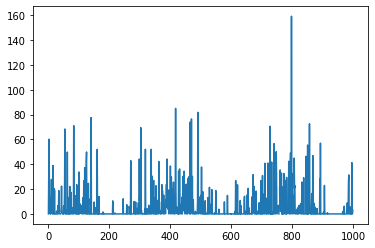

In [0]:
df[df.vel_vento_med.isna()]
plt.plot(df.precipitacao[1: 1000])
df.precipitacao.median()

In [0]:
# para completar os valores falltantes usarei:
# mediana para temperaturas
# media para precipitacao, insolacao, evaporacao, umidade, velocidade do vento
# se tivesse algum parametro categorico seria moda
df.precipitacao = df.precipitacao.fillna(df.precipitacao.mean())
df.insolacao = df.insolacao.fillna(df.insolacao.mean())
df.evaporacao_piche = df.evaporacao_piche.fillna(df.evaporacao_piche.mean())
df.umidade_rel_med = df.umidade_rel_med.fillna(df.umidade_rel_med.mean())
df.vel_vento_med = df.vel_vento_med.fillna(df.vel_vento_med.mean())
df.temp_comp_med = df.temp_comp_med.fillna(df.temp_comp_med.mean())
df.temp_max = df.temp_max.fillna(df.temp_max.mean())
df.temp_min = df.temp_min.fillna(df.temp_min.mean())
df[df.precipitacao.isna()]

resp.precipitacao = resp.precipitacao.fillna(resp.precipitacao.mean())
resp.insolacao = resp.insolacao.fillna(resp.insolacao.mean())
resp.evaporacao_piche = resp.evaporacao_piche.fillna(resp.evaporacao_piche.mean())
resp.umidade_rel_med = resp.umidade_rel_med.fillna(resp.umidade_rel_med.mean())
resp.vel_vento_med = resp.vel_vento_med.fillna(resp.vel_vento_med.mean())
resp.temp_comp_med = resp.temp_comp_med.fillna(resp.temp_comp_med.mean())
resp.temp_max = resp.temp_max.fillna(resp.temp_max.mean())
resp.temp_min = resp.temp_min.fillna(resp.temp_min.mean())

In [0]:
correlation_matrix = np.corrcoef(df.id, df.temp_max)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)


0.04635303363374657


In [0]:
import sklearn as skl
from sklearn import svm
y = df.fires
X = df.drop("id", axis = 1)
X = X.drop("estacao", axis = 1)
X = X.drop("fires", axis = 1)

resp_id = resp.id

X_resp = resp.drop("id", axis = 1)
X_resp = X_resp.drop("estacao", axis = 1)
print(X_resp.columns)

Index(['precipitacao', 'temp_max', 'temp_min', 'insolacao', 'evaporacao_piche',
       'temp_comp_med', 'umidade_rel_med', 'vel_vento_med', 'altitude', 'ano',
       'mes', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object')


In [0]:
#from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
# Fit your data on the scaler object

#scaled_X = scaler.fit_transform(X)
#scaled_X = pd.DataFrame(scaled_X, columns = X.columns)
#scaled_X_resp = scaler.fit_transform(X_resp)
#scaled_X_resp = pd.DataFrame(scaled_X_resp, columns = X_resp.columns)

In [0]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
251762    0
251763    0
251764    0
251765    0
251766    0
Name: fires, Length: 251767, dtype: int64


In [0]:
X_train = scaled_X[:200000]
y_train = y[:200000]
X_test = scaled_X[200000:]
y_test = y[200000:]

In [0]:
#from sklearn.ensemble import RandomForestClassifier
#lin = RandomForestClassifier(max_depth=2, random_state=0)
#lin = svm.LinearSVC()
from sklearn.neighbors import KNeighborsClassifier
lin = KNeighborsClassifier(n_neighbors=3)
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

skl.metrics.confusion_matrix(y_test, y_pred)
print("number of falses:", y[y == 0].size, "\n")
print("number of true:", y[y == 1].size, "\n")

number of falses: 188271 

number of true: 63496 



In [0]:
print(skl.metrics.confusion_matrix(y_test, y_pred))

[[32190  6808]
 [ 7845  4924]]


In [0]:
y_resp = lin.predict(scaled_X_resp)

In [0]:
#print(resp_id)
# = {'id' : resp_id, 'fires' : y_resp}
resp_df = pd.DataFrame(columns= {'id', 'fires'})
print(len(resp_id), len(y_resp))
resp_df['id'] = resp_id
resp_df['fires'] = y_resp
#resp_id = pd.concat([resp_id, y_resp], axis=1 )
print(resp_df)

44342 44342
           id  fires
0      251768      0
1      251769      0
2      251770      0
3      251771      0
4      251772      0
...       ...    ...
44337  296105      0
44338  296106      0
44339  296107      0
44340  296108      0
44341  296109      0

[44342 rows x 2 columns]


In [0]:
resp_df.to_csv("/content/drive/My Drive/carreira/hackaton/data/dados.csv", index = False)